In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

width = 16
height = 16

def generate_dataset(samples):
    ds_x = []
    ds_y = []
    for it in range(samples):
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        ds_y.append(num_pt)
        ds_x.append(img)
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)

def generate_image(points):
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    return img.reshape(width, height, 1)

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 생성하기
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam')

In [6]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 6s 4ms/step - loss: 12210.2331 - val_loss: 1965.4662
Epoch 2/1000
1500/1500 [==============================] - 0s 108us/step - loss: 1492.0017 - val_loss: 1164.0957
Epoch 3/1000
1500/1500 [==============================] - 0s 104us/step - loss: 1062.5636 - val_loss: 903.3186
Epoch 4/1000
1500/1500 [==============================] - 0s 108us/step - loss: 847.1869 - val_loss: 712.7196
Epoch 5/1000
1500/1500 [==============================] - 0s 109us/step - loss: 672.8015 - val_loss: 550.7358
Epoch 6/1000
1500/1500 [==============================] - 0s 113us/step - loss: 485.8533 - val_loss: 326.7621
Epoch 7/1000
1500/1500 [==============================] - 0s 106us/step - loss: 333.3797 - val_loss: 255.1111
Epoch 8/1000
1500/1500 [==============================] - 0s 109us/step - loss: 259.0905 - val_loss: 238.3539
Epoch 9/1000
1500/1500 [==============================] - 0s 112us/st

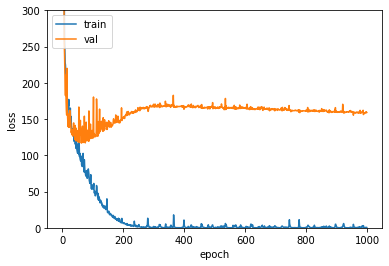

In [7]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
# 7. 모델 평가하기
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

100/100 [==============================] - 0s 262us/step
236.95523315429688


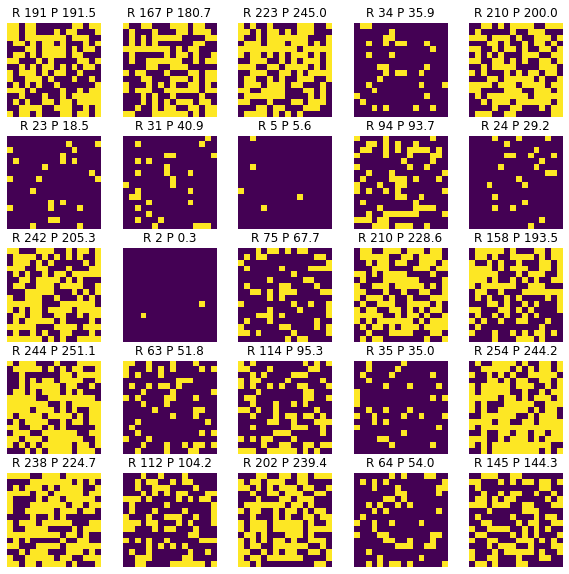

In [11]:
# 8. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' %(y_test[i][0], yhat_test[i][0]))